<a href="https://colab.research.google.com/github/16520229/CS114.K21/blob/master/Animal_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Thêm drive vào colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Tạo thư mục animal-10 để chứa dữ liệu
%mkdir /content/drive/My\ Drive/Data/animal-10

# ***1. DownLoad Data:***

In [ ]:
%cd /content/drive/My\ Drive/Data/animal-10

/content/drive/My Drive/Data/animal-10


In [ ]:
# Thêm file kaggle.json chứa thông tin tài khoản của trang kaggle để có thể gọi Api cho kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
%cd ~

/root


In [ ]:
%mkdir .kaggle/

In [ ]:
%ls -a

./             .bashrc   .gsutil/   .kaggle/  .node-gyp/
../            .cache/   .ipython/  .keras/   .npm/
.bash_history  .config/  .jupyter/  .local/   .profile


In [ ]:
!cp /content/drive/My\ Drive/Data/animal-10/kaggle.json ~/.kaggle/

In [ ]:
%cd ~/.kaggle/

/root/.kaggle


In [ ]:
%ls -a

./  ../  kaggle.json


In [ ]:
%cd /content/drive/My\ Drive/Data/animal-10/

/content/drive/My Drive/Data/animal-10


In [ ]:
# Tải dữ liệu từ kaggle về
!kaggle datasets download -d alessiocorrado99/animals10

100% 584M/586M [00:06<00:00, 113MB/s]
100% 586M/586M [00:06<00:00, 96.6MB/s]


# ***2. Preprocessing***

In [ ]:
!mkdir data

Unzip animals10.zip

In [ ]:
import zipfile

local_zip = '/content/drive/My Drive/Data/animal-10/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(".")
zip_ref.close()

Hiện thị số ảnh của mỗi loại động vật

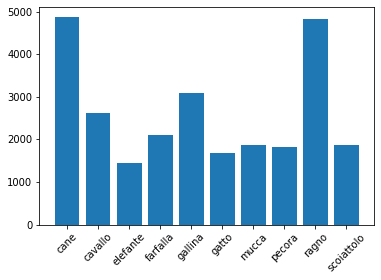

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

def barChart(data):
    """
    Agr:
    - data: type is the dictionary. Keys is the name of class, values is the numbers of elements in class.
    Return:
    - Bar chart of data
    """
    x_pos = [i for i, _ in enumerate(data.keys())]
    plt.bar(x_pos, data.values())
    plt.xticks(x_pos, data.keys(), rotation = 45)
    plt.show()
    
base_dir = '/content/drive/My Drive/Data/animal-10'
raw_data = os.path.join(base_dir, 'raw-img')
list_animal = os.listdir(raw_data)

num_of_each_animal = {}
# translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}
for x in list_animal:
    temp1 = os.path.join(raw_data, x)
    temp2 = os.path.join(raw_data, x)
    os.rename(temp1, temp2)
    num = os.listdir(temp2)
    num_of_each_animal[x] = len(num)
barChart(num_of_each_animal)

Train-Val-Test = 70-10-20

Tạo 3 folder train, val và test.

In [ ]:
import os
import shutil

def createDir(path, list_dir):
    """
    Agr:
    - path: là đường dẫn lưu các sub directory. This is a string.
    - list_dir: là danh sách các thư mục sẽ được tạo. This is a list.
    Return:
    - path of each directory in dict
    """
    path_of_dir = {}
    for x in list_dir:
        new_dir = os.path.join(path, x)
        if not os.path.exists(new_dir):
            os.mkdir(new_dir)
        path_of_dir[x] = new_dir
    return path_of_dir
def processRawData(raw_path, ratio, des_path):
    """
    Agr:
    - raw_path: this is the path of raw data.(string)
    - ratio: this is the ratio of train-val-test data.(list)
    - des_path: this is the path of save data is processed.(string)
    Return:
    - data is processed.
    """
    #Create data diretory
    data_dir = createDir(des_path, ['data'])['data']
    part_data = ['train', 'val', 'test']
    data_class = createDir(data_dir, part_data)
    #Create class directory
    raw_class = os.listdir(raw_path)
    path_of_class = {}
    for x in part_data:
        tem = createDir(data_class[x], raw_class)
        path_of_class[x] = tem
    #Div data
    for x in raw_class:
        raw_data_dir = os.path.join(raw_path, x)
        raw_data = os.listdir(raw_data_dir)

        train = int(len(raw_data)*ratio[0])
        val = int(len(raw_data)*(ratio[0] + ratio[1]))
        
        for y in raw_data[:train]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['train'][x])
        for y in raw_data[train:val]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['val'][x])
        for y in raw_data[val:]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['test'][x])
base_dir = '/content/drive/My Drive/Data/animal-10'
raw_dir = os.path.join(base_dir, 'raw-img')
processRawData(raw_dir, [0.7, 0.1, 0.2], base_dir)

In [ ]:
def check(raw_dir, data_dir):
    raw_class = os.listdir(raw_dir)
    test = os.path.join(data_dir, 'test')
    print(test)
    for x in raw_class:        
        amount_raw = len(os.listdir(os.path.join(raw_dir, x)))        
        amount_data = 0
        for y in ['train', 'val', 'test']:
            tem = os.path.join(data_dir, y)
            tem = os.path.join(tem, x)
            amount_data += len(os.listdir(tem))
        print(x, ":", amount_raw == amount_data, amount_data, amount_raw)
        print(x, "test:", len(os.listdir(os.path.join(test, x))))
base_dir = '/content/drive/My Drive/Data/animal-10'
raw_dir = os.path.join(base_dir, 'raw-img')
data_dir = os.path.join(base_dir, 'data')
check(raw_dir, data_dir)

/content/drive/My Drive/Data/animal-10/data/test
cane : True 4863 4863
cane test: 973
cavallo : True 2623 2623
cavallo test: 525
elefante : True 1446 1446
elefante test: 290
farfalla : True 2112 2112
farfalla test: 423
gallina : True 3098 3098
gallina test: 620
gatto : True 1668 1668
gatto test: 334
mucca : True 1866 1866
mucca test: 374
pecora : True 1820 1820
pecora test: 365
ragno : True 4821 4821
ragno test: 965
scoiattolo : True 1862 1862
scoiattolo test: 373


# ***3. Preprocessing image***

In [ ]:
%tensorflow_version 2.x

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Tạo một ImageDataGenerator. Dùng để đọc một folder.

In [ ]:
base_dir = '/content/drive/My Drive/Data/animal-10/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
evaluation_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen  = ImageDataGenerator(rescale = 1./255)
evl_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical')
validation_generation = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')
evaluation_generation = evl_datagen.flow_from_directory(
    evaluation_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle = False)

Found 18322 images belonging to 10 classes.
Found 2615 images belonging to 10 classes.
Found 5242 images belonging to 10 classes.


# ***4. Model:***

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model 

from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Create VGG16 model
input_tensor = layers.Input(shape=(224, 224, 3))
model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze first 15 layer
for layer in model.layers[:15]:
    layer.trainable = False
last_layer = model.get_layer('block5_pool')
last_output = last_layer.output
print(last_output)

Tensor("block5_pool/Identity:0", shape=(None, 7, 7, 512), dtype=float32)


In [ ]:
# Build Fully-connected
top_model = layers.Flatten()(last_output)
top_model = layers.Dropout(0.5)(top_model)
top_model = layers.Dense(1024, activation = 'relu')(top_model)
top_model = layers.Dense(10, activation = 'softmax')(top_model)

model = Model(model.input, top_model)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
                optimizer=Adam(lr = 0.0001),
                metrics = ['acc'])

In [ ]:
step_epoch = train_generator.n//train_generator.batch_size + 1
step_vali = validation_generation.n//validation_generation.batch_size + 1
print(step_epoch)
print(step_vali)

144
41


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = step_epoch,
    epochs = 50,
    validation_data = validation_generation,
    validation_steps = step_vali,
    verbose = 1)
model.save('./model.h5')
import pickle
with open('./trainHistory', 'wb') as f:
    pickle.dump(history.history, f)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
144/144 [==============================] - 363s 3s/step - loss: 1.1845 - acc: 0.5987 - val_loss: 0.5486 - val_acc: 0.8203
Epoch 2/50
144/144 [==============================] - 378s 3s/step - loss: 0.5772 - acc: 0.8079 - val_loss: 0.4253 - val_acc: 0.8593
Epoch 3/50
144/144 [==============================] - 355s 2s/step - loss: 0.4499 - acc: 0.8513 - val_loss: 0.3503 - val_acc: 0.8830
Epoch 4/50
144/144 [==============================] - 356s 2s/step - loss: 0.3786 - acc: 0.8739 - val_loss: 0.2964 - val_acc: 0.9117
Epoch 5/50
144/144 [==============================] - 354s 2s/step - loss: 0.3267 - acc: 0.8905 - val_loss: 0.2982 - val_acc: 0.9109
Epoch 6/50
144/144 [==============================] - 353s 2s/step - loss: 0.2937 - acc: 0.9034 - val_loss: 0.2903 - val_acc: 0.9113
Epoch 7/50
144/144 [==============================] - 353s 2s/step - loss: 0.2656 - acc: 0.9130 - val_loss: 0.2681 - val_acc: 

Lưu Model và lịch sử huấn luyện:

# ***5. Đánh giá***

In [ ]:
%cd /content/drive/My\ Drive/Data/animal-10

/content/drive/My Drive/Data/animal-10


Text(0.5, 1.0, 'Training and validation loss')

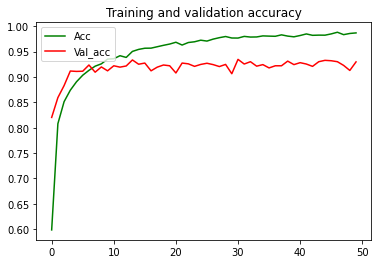

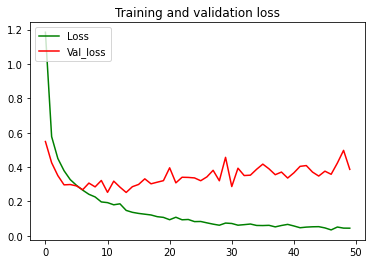

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import pickle
with open('./trainHistory', 'rb') as f:
    history = pickle.load(f)
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history['acc']
val_acc = history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history['loss']
val_loss = history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(history['acc'],'green',label='Acc')
plt.plot(history['val_acc'],'red',label='Val_acc')
plt.legend(loc='upper left')
# plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(history['loss'],'green',label='Loss')
plt.plot(history['val_loss'],'red',label='Val_loss')
plt.legend(loc='upper left')
# plt.plot(epochs, loss)
# plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
def draw_heatmap_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    classes.sort()

    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    thresol = cm.max()*0.7 + cm.min()*0.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresol else "black")
    plt.colorbar()

    plt.title("Confusion matrix")
    plt.ylabel("True lable", rotation = 90)
    plt.xlabel("Predict lable")
"""
evaluation_generation.reset()
Y_pred = model.predict_generator(evaluation_generation)
classes = evaluation_generation.classes[evaluation_generation.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
"""

'\nevaluation_generation.reset()\nY_pred = model.predict_generator(evaluation_generation)\nclasses = evaluation_generation.classes[evaluation_generation.index_array]\ny_pred = np.argmax(Y_pred, axis=-1)\n'

In [ ]:
evaluation_generation.reset()
Y_true = evaluation_generation.labels

Y_pred = model.predict_generator(evaluation_generation, steps = 82)
y_pred = np.argmax(Y_pred, axis=-1)

NameError: ignored

In [ ]:
base_dir = '/content/drive/My Drive/Data/animal-10/data'
evaluation_dir = os.path.join(base_dir, 'test')
target_names = os.listdir(evaluation_dir)
draw_heatmap_confusion_matrix(Y_true, y_pred, target_names)
print('Classification Report')
print(classification_report(evaluation_generation.classes, y_pred, target_names=target_names))

NameError: ignored

In [ ]:
# score = model.evaluate_generator(evaluation_generation, steps = 82)
from tensorflow.keras.models import load_model
score = load_model('/content/drive/My Drive/Data/animal-10/raw-img/model.h5')
print("loss:", score[0])
print("acc:", score[1])

OSError: ignored

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)